In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def vec_mu(mu1, mu2):
    mu = np.array([
        [mu1],
        [mu2]
    ])
    return mu

def matrix_sigma(s1, s2, rho):
    Sigma = np.array([
        [s1**2, rho*s1*s2],
        [rho*s1*s2, s2**2]
    ])
    return Sigma

def dist_norm(x1, x2, mu1, mu2, s1, s2, rho):
    norm_term = 1/(2*np.pi*s1*s2*np.sqrt(1 - rho**2))
    t1 = (x1 - mu1)**2/s1**2
    t2 = -2*rho*(x1 - mu1)*(x2 - mu2)/(s1*s2)
    t3 = (x2 - mu2)**2/s2**2
    dist_term = np.exp(-(t1+t2+t3)/(2*(1 - rho**2)))
    return norm_term*dist_term

def exp_conditioned(x1, x2, mu1, mu2, s1, s2, rho):
    s11 = s1**2; s12 = rho*s1*s2; s22 = s2**2
    ex1_x2 = mu1 + s12*s22**(-1)*(x2 - mu2)
    ex2_x1 = mu2 + s12*s11**(-1)*(x1 - mu1)
    return [ex1_x2, ex2_x1]
    


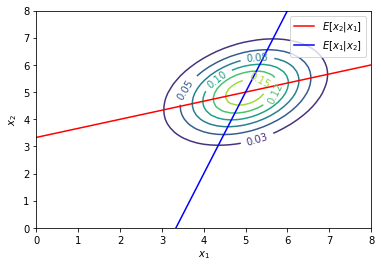

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r"$x_1$"); ax.set_ylabel(r"$x_2$")
x1 = np.linspace(0, 8, 51); x2 = np.linspace(0, 8, 51)
X1_grid, X2_grid = np.meshgrid(x1, x2)
value = dist_norm(x1=X1_grid, x2=X2_grid, mu1=5, mu2=5, s1=1, s2=1, rho=1/3)
cont = ax.contour(X1_grid, X2_grid, value)
cont.clabel(fmt='%1.2f')
exp_val = exp_conditioned(x1=x1, x2=x2, mu1=5, mu2=5, s1=1, s2=1, rho=1/3)
ax.plot(x1, exp_val[0], c = 'r', label = r"$E[x_2 | x_1]$")
ax.plot(exp_val[1], x2, c = 'b', label = r"$E[x_1 | x_2]$")
ax.legend(loc = 'best')
plt.show()

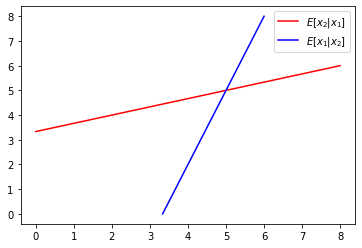

In [15]:
x1 = np.linspace(0, 8, 51); x2 = np.linspace(0, 8, 51)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.show()